# Title: MVP 3

Name    : Joshua Hor Soong, Cheng
Email   : chen7647@umn.edu 


## 1. Design Framework

### 1.1. Problem Statement
- studying the differences about the zoning plans Minneapolis council has between now and 2040

### 1.2. Solution
using geopandas, we can plot each zones on the mineapolis map. both the current zones and the zone plans for 2040 to determine how much more residential or industrial is the council planning for Minneapolis to become

### 1.3. Challenge
determining the best way to evaluate the change of these zone change plans

### 1.4 Spec list

Fill in the spec list table below.
  * Value: (H)igh, (M)edium, (L)ow
  * Effort: (H)igh, (M)edium, (L)ow
  * Feature: Brief description of the feature


| Value | Effort  | Feature    | 
|:------|:--------|:-----------|
| H     | L       | a geographic visual comparison of the current zones vs the zone plans in 2040 |
| H     | M       | get the statistical calculations of the land size change of each zones |
| M     | H       | GeoAI processing - success rate of this change |


### 1.5 references and data sources

### source of data
https://opendata.minneapolismn.gov/datasets/cityoflakes::planning-primary-zoning/explore?location=44.970842%2C-93.261692%2C11.52&showTable=true

https://opendata.minneapolismn.gov/datasets/cityoflakes::future-land-use-and-built-form-2040/explore?showTable=true

### other informations related to the column headings
#### zoning codes and build form
https://www2.minneapolismn.gov/business-services/planning-zoning/zoning-maps/zoning-code-descriptions/#d.en.202240



___

# 2. Minimal Viable Product

## 2.1.1 Setup & Installation

In the code cell below, you will write all your import and load statements for the packages and data needed for your project.

In [2]:
# Import Modules and Packages you need to run your MVP in this code cell
# %pip install contextily
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import contextily as ctx

## 2.1.2 Opening .shp files and Evaluating tables

### 2.1.2.1 opening the current 2025 Minneapolis Zonings

OBJECTID              Land_Use Land_Use_C  \
0            1   Community Mixed Use        CM3   
1            2   Community Mixed Use        CM3   
2            3   Community Mixed Use        CM3   
3            4   Community Mixed Use        CM3   
4            5   Community Mixed Use        CM3   
...        ...                   ...        ...   
1255      1256  Urban Neighborhood 3        UN3   
1256      1257  Urban Neighborhood 3        UN3   
1257      1258  Urban Neighborhood 3        UN3   
1258      1259  Urban Neighborhood 3        UN3   
1259      1260  Urban Neighborhood 3        UN3   

                                               geometry   color  
0     POLYGON ((-10380666.499 5619819.426, -10380752...  orange  
1     POLYGON ((-10380162.544 5616517.416, -10380162...  orange  
2     POLYGON ((-10385535.998 5619061.383, -10385620...  orange  
3     POLYGON ((-10378866.861 5613971.531, -10378840...  orange  
4     POLYGON ((-10380509.12 5616192.283, -10380465....  orange  
...                                                 ...     ...  
1255  POLYGON ((-10377612.098 5605896.357, -10377610...  yellow  
1256  POLYGON ((-10378269.074 5610302.759, -10378269...  yellow  
1257  POLYGON ((-10382598.525 5625305.118, -10382598...  yellow  
1258  POLYGON ((-10382604.194 5624769.911, -10382604...  yellow  
1259  POLYGON ((-10378625.947 5611074.097, -10378622...  yellow  

[1260 rows x 5 columns]

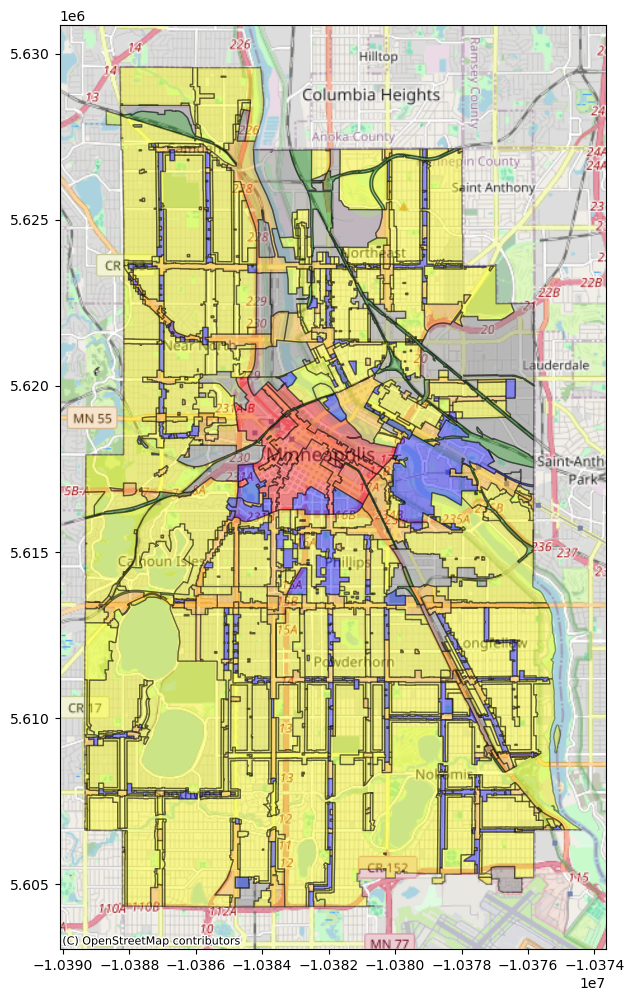

In [ ]:
shp_2025_filePath = r"Planning_Primary_Zoning\Planning_Primary_Zoning.shp"

gdf_2025 = gpd.read_file(shp_2025_filePath)
fig1, ax1 = plt.subplots(1, 1, figsize=(12, 12))

gdf_2025["color"] = "cyan"

gdf_2025 = gdf_2025[['OBJECTID', "Land_Use", 'Land_Use_C', 'geometry', 'color']]
def set_GDF2025_ZoningColor():
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('UN'), 'color'] = 'yellow'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('RM'), 'color'] = 'blue'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('CM'), 'color'] = 'orange'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('DT'), 'color'] = 'red'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('PR'), 'color'] = 'grey'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('TR'), 'color'] = 'green'
    
set_GDF2025_ZoningColor()
gdf_2025.loc[gdf_2025['Land_Use'].str.startswith('Urban Neighborhood'), 'Land_Use'] = 'Urban Neighborhood'
gdf_2025.plot(ax=ax1, color=gdf_2025["color"], edgecolor='k', linewidth=1.0, alpha=0.4)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)

gdf_2025


In [4]:
# Get unique values for 'Land_Use' --> i call it primary zonings (this is what its actually called in the documents: https://www2.minneapolismn.gov/business-services/planning-zoning/zoning-maps/zoning-code-descriptions/#d.en.202240)
def getUniqueFields(df, col, debug=1):
    out = df[col].dropna().unique()
    if debug == 1:
        print(f"unique {col} fields : ")
        print(out)
        print(len(out))
    return out

# primary_zonings = getUniqueFields(gdf_2025, "Land_Use")

print("gdf_2025 columns: ", gdf_2025.columns)
primary_zonings_c = getUniqueFields(gdf_2025, "Land_Use_C")


# primary_zonings = gdf_2025['Land_Use'].unique()
# print("Unique values in 'Land_Use':")
# print(primary_zonings)
# print(len(primary_zonings))
# print("--------------------------------------")

# primary_zonings_c = gdf_2025['Land_Use_C'].unique()
# print("Unique values in 'Land_Use_C':")
# print(primary_zonings_c)
# print(len(primary_zonings_c))

# gdf_2025[["Land_Use", "Land_Use_C"]]

gdf_2025 columns:  Index(['OBJECTID', 'Land_Use', 'Land_Use_C', 'geometry', 'color'], dtype='object')
unique Land_Use_C fields : 
['CM3' 'CM2' 'CM4' 'DT1' 'DT2' 'CM1' 'PR2' 'PR1' 'RM3' 'RM1' 'RM2' 'TR1'
 'UN1' 'UN2' 'UN3']
15


### 2.1.2.2 opening year 2040 Minneapolis land use plans

OBJECTID              Land_Use  Built_Form  \
0              1  Production Mixed Use  Corridor 4   
1              2  Parks and Open Space       Parks   
2              3  Production Mixed Use  Corridor 4   
3              4  Production Mixed Use  Corridor 4   
4              5  Production Mixed Use  Corridor 4   
...          ...                   ...         ...   
102561    102562    Urban Neighborhood  Interior 3   
102562    102563    Urban Neighborhood  Interior 3   
102563    102564    Urban Neighborhood  Interior 3   
102564    102565    Urban Neighborhood  Interior 3   
102565    102566    Urban Neighborhood  Interior 3   

                                                 geometry color  
0       POLYGON ((-10385558.693 5618070.198, -10385613...   red  
1       POLYGON ((-10385614.099 5617936.049, -10385622...   red  
2       POLYGON ((-10385797.984 5617914.714, -10385799...   red  
3       POLYGON ((-10385799.337 5617591.462, -10385797...   red  
4       POLYGON ((-10385330.434 5617911.834, -10385330...   red  
...                                                   ...   ...  
102561  POLYGON ((-10380377.726 5621002.709, -10380377...   red  
102562  POLYGON ((-10380377.726 5621002.709, -10380322...   red  
102563  POLYGON ((-10380377.527 5620986.452, -10380321...   red  
102564  POLYGON ((-10380376.373 5620892.072, -10380320...   red  
102565  POLYGON ((-10380376.087 5620868.684, -10380363...   red  

[102566 rows x 5 columns]

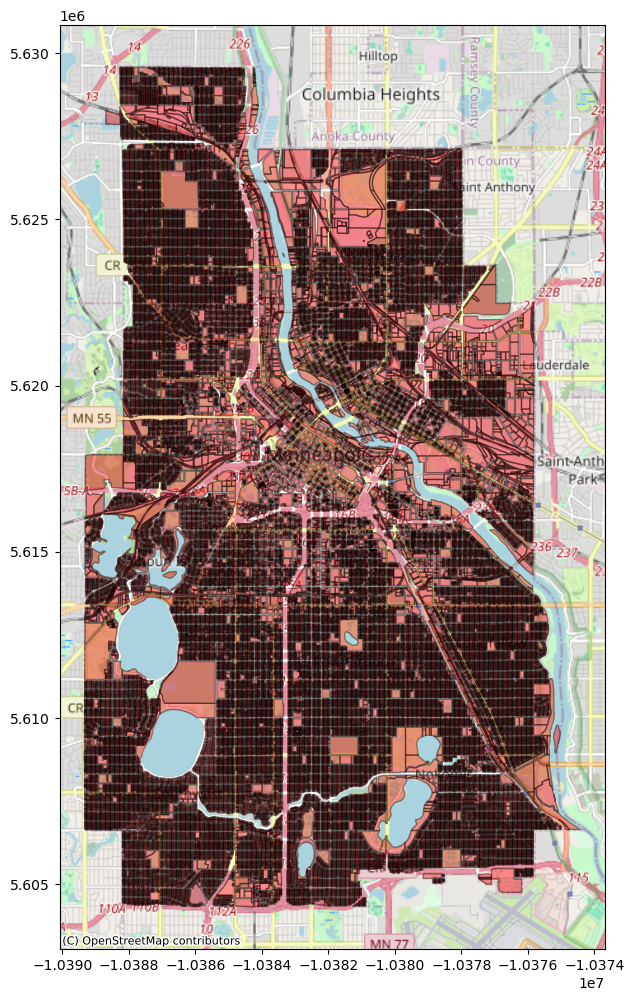

In [ ]:
shp_2040_filePath = r"Future_Land_Use_and_Built_Form_2040\Future_Land_Use_and_Built_Form_2040.shp"
gdf_2040 = gpd.read_file(shp_2040_filePath)
gdf_2040 = gdf_2040.to_crs(gdf_2025.crs)

# for quicker development purposes for now
# gdf_2040 = gdf_2040[:50000] 
# gdf_2040 = gdf_2040[["ZIPCD","X_CENTROID", "Y_CENTROID", "Acres", "Land_Use", "Built_Form", "RuleID_BF", "RuleID_LU", "Shape__Are", "Shape__Len", "geometry"]]
gdf_2040 = gdf_2040[["OBJECTID","Land_Use", "Built_Form", "geometry"]]

gdf_2040["color"] = "red"
def set_GDF2025_ZoningColor():
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('UN'), 'color'] = 'yellow'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('RM'), 'color'] = 'blue'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('CM'), 'color'] = 'orange'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('DT'), 'color'] = 'red'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('PR'), 'color'] = 'grey'
    gdf_2025.loc[gdf_2025['Land_Use_C'].str.startswith('TR'), 'color'] = 'green'
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 12))
gdf_2040.plot(ax=ax2, color=gdf_2040["color"], edgecolor='k', linewidth=1.0, alpha=0.4)
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)

gdf_2040

In [7]:
print("gdf_2040 columns: ", gdf_2040.columns)
Land_Use = getUniqueFields(gdf_2040, "Land_Use")
Built_Form = getUniqueFields(gdf_2040, "Built_Form")
# RuleID_BF = getUniqueFields(gdf_2040, "RuleID_BF")
# RuleID_LU = getUniqueFields(gdf_2040, "RuleID_LU")


gdf_2040 columns:  Index(['OBJECTID', 'Land_Use', 'Built_Form', 'geometry', 'color'], dtype='object')
unique Land_Use fields : 
['Production Mixed Use' 'Parks and Open Space' 'Corridor Mixed Use'
 'Production and Processing' 'Urban Neighborhood' 'Community Mixed Use'
 'Destination Mixed Use' 'Neighborhood Mixed Use' 'Transportation'
 'Public, Office, and Institutional' 'Neighborhood Office and Services']
11
unique Built_Form fields : 
['Corridor 4' 'Parks' 'Transit 10' 'Corridor 6' 'Transit 15' 'Interior 2'
 'Interior 3' 'Interior 1' 'Corridor 3' 'Production' 'Transportation'
 'Transit 30' 'Core 50' 'Transit 20']
14


### 2040 building plans overlayed on current 2025 zonings

In [8]:
print(f"CRS of gdf_2025: {gdf_2025.crs}")
print(f"CRS of gdf_2040: {gdf_2040.crs}")

print("gdf_2025 = ", len(gdf_2025))
print("gdf_2040 = ", len(gdf_2040))

gdf_2025_2040 = gpd.sjoin(gdf_2025, gdf_2040, how="left")
print("gdf_2025_2040 = ", len(gdf_2025_2040))
gdf_2025_2040

CRS of gdf_2025: EPSG:3857
CRS of gdf_2040: EPSG:3857
gdf_2025 =  1260
gdf_2040 =  102566
gdf_2025_2040 =  111346


OBJECTID_left         Land_Use_left Land_Use_C  \
0                 1   Community Mixed Use        CM3   
0                 1   Community Mixed Use        CM3   
0                 1   Community Mixed Use        CM3   
0                 1   Community Mixed Use        CM3   
0                 1   Community Mixed Use        CM3   
...             ...                   ...        ...   
1255           1256  Urban Neighborhood 3        UN3   
1256           1257  Urban Neighborhood 3        UN3   
1257           1258  Urban Neighborhood 3        UN3   
1258           1259  Urban Neighborhood 3        UN3   
1259           1260  Urban Neighborhood 3        UN3   

                                               geometry color_left  \
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
...                                                 ...        ...   
1255  POLYGON ((-10377612.098 5605896.357, -10377610...     yellow   
1256  POLYGON ((-10378269.074 5610302.759, -10378269...     yellow   
1257  POLYGON ((-10382598.525 5625305.118, -10382598...     yellow   
1258  POLYGON ((-10382604.194 5624769.911, -10382604...     yellow   
1259  POLYGON ((-10378625.947 5611074.097, -10378622...     yellow   

      index_right  OBJECTID_right             Land_Use_right  Built_Form  \
0         66001.0         66002.0       Parks and Open Space       Parks   
0         65245.0         65246.0       Parks and Open Space       Parks   
0         64720.0         64721.0        Community Mixed Use  Transit 10   
0         68145.0         68146.0       Parks and Open Space       Parks   
0         65407.0         65408.0       Parks and Open Space       Parks   
...           ...             ...                        ...         ...   
1255          NaN             NaN                        NaN         NaN   
1256          NaN             NaN                        NaN         NaN   
1257          NaN             NaN                        NaN         NaN   
1258      50607.0         50608.0  Production and Processing  Production   
1259          NaN             NaN                        NaN         NaN   

     color_right  
0            red  
0            red  
0            red  
0            red  
0            red  
...          ...  
1255         NaN  
1256         NaN  
1257         NaN  
1258         red  
1259         NaN  

[111346 rows x 10 columns]

### first identifying what rows in the left and right df didn't get match or join to each other

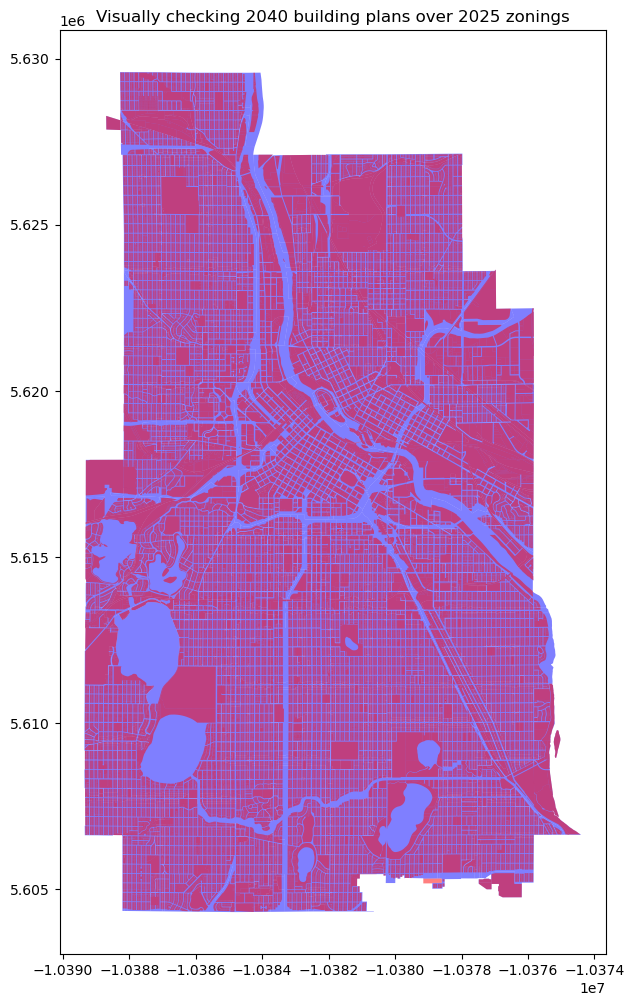

In [9]:
# basic layer of information without any coloring
# - blue = 2025 zonings
# - red = 2040 minneapolis building plans that are within current zonings

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf_2025.plot(ax=ax, color='blue', alpha=0.5, label='2025 Zoning')

gdf_2040["color"] = "red"
gdf_2040.plot(ax=ax, color=gdf_2040["color"], alpha=0.5, label='2040 Plan')

ax.set_title("Visually checking 2040 building plans over 2025 zonings")

plt.show()

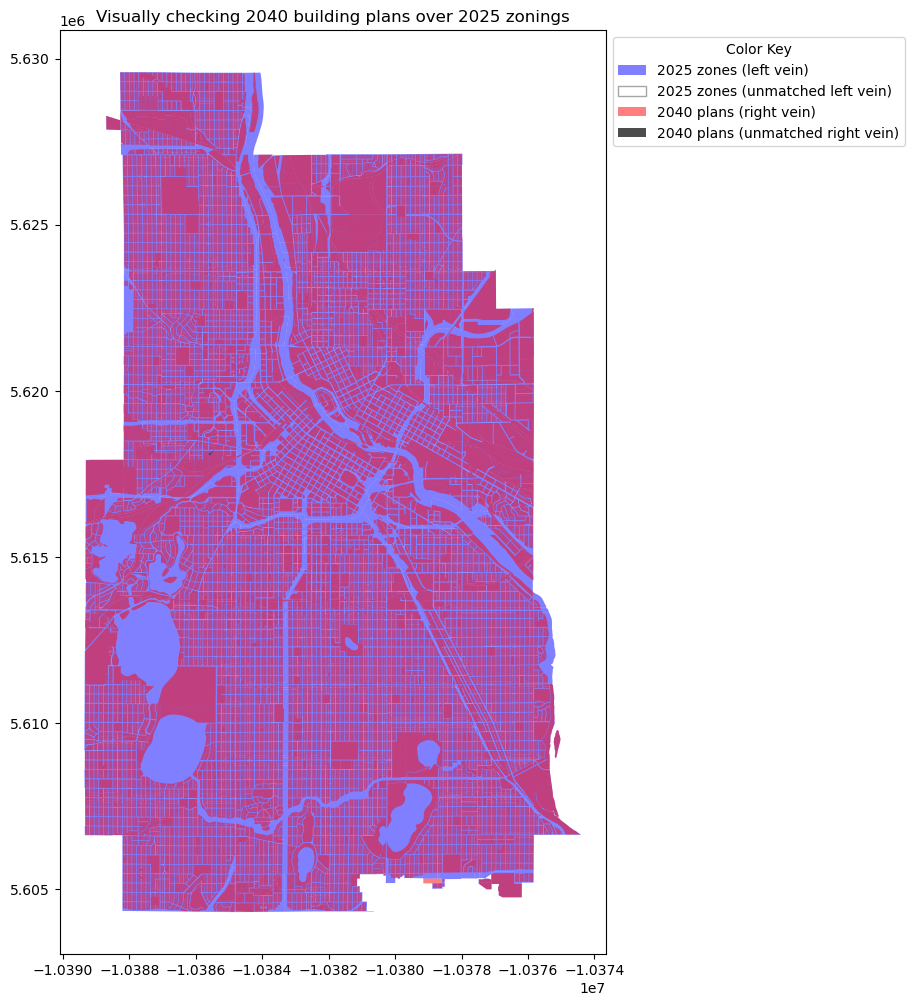

In [10]:
# basic layer of information without any coloring
# - blue = 2025 zonings (left vein)
# - red = 2040 minneapolis building plans that are within current zonings (right vein)
# - black = 2040 minneapolis buildings that are not within current 2025 zonings (unmatched right vein)
# - white = 2025 zones that don't have any buildings (unmatched left vein)
# and also if you're imagining in the form of a vein diagram, gdf_2025 would be the left vein and gdf_2040 would be the right vein

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# getting right df that didn't get matched or joined to left df --> black color
gdf_2040["color"] = "red"
matched_gdf_2040_cols = getUniqueFields(gdf_2025_2040, "OBJECTID_right", debug=0)
matched_gdf_2040_cols = matched_gdf_2040_cols.astype(int)
unmatched_gdf_2040_cols = gdf_2040[~gdf_2040.index.isin(matched_gdf_2040_cols)] 
gdf_2040.loc[unmatched_gdf_2040_cols.index, 'color'] = 'black'
unmatched_gdf_2040_cols = gdf_2040[gdf_2040["color"].str.startswith("black")] # unmatched right df

# getting left df that didn't get matched or joined to right df --> white color
gdf_2025["color"] = "blue"
unmatched_gdf_2025_cols = gdf_2025_2040[gdf_2025_2040['OBJECTID_right'].isna()]
gdf_2025.loc[gdf_2025["OBJECTID"].isin(unmatched_gdf_2025_cols["OBJECTID_left"]), 'color'] = 'white'
unmatched_gdf_2025_cols = gdf_2025[gdf_2025["color"].str.startswith("white")] # unmatched left df

gdf_2025.plot(ax=ax, color=gdf_2025["color"], alpha=0.5, label='2025 Zoning')
gdf_2040.plot(ax=ax, color=gdf_2040["color"], alpha=0.5, label='2040 Plan')

# legends and map info
info_text = "Color Key:\n- Blue: 2025 zones (left vein)\n- Red: 2040 plans (right vein)\n- Black: 2040 plans (unmatched right vein)\n- White: 2025 zones (unmatched left vein)"
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='2025 zones (left vein)'),
    Patch(facecolor='white', edgecolor='gray', alpha=0.7, label='2025 zones (unmatched left vein)'),
    Patch(facecolor='red', alpha=0.5, label='2040 plans (right vein)'),
    Patch(facecolor='black', alpha=0.7, label='2040 plans (unmatched right vein)')
]
ax.legend(handles=legend_elements, title="Color Key", loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title("Visually checking 2040 building plans over 2025 zonings")

plt.show()

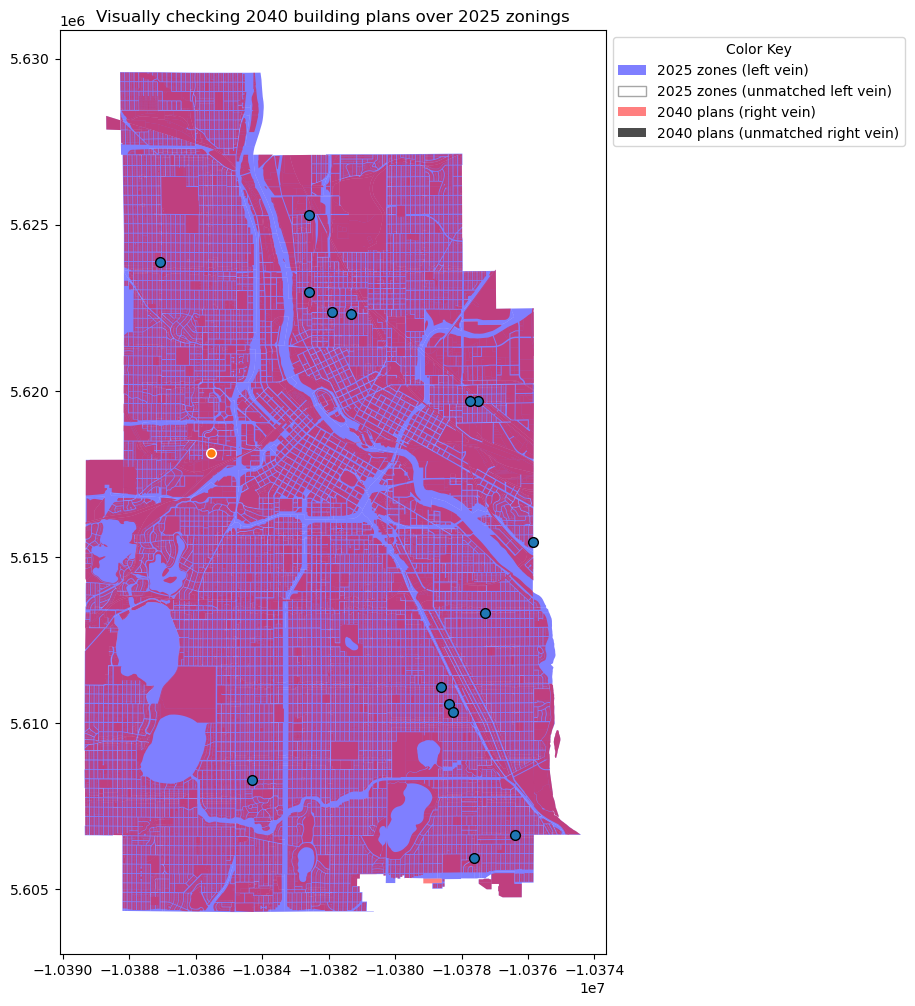

In [11]:
# basic layer of information without any coloring
# - blue = 2025 zonings (left vein)
# - red = 2040 minneapolis building plans that are within current zonings (right vein)
# - black = 2040 minneapolis buildings that are not within current 2025 zonings (unmatched right vein)
# - white = 2025 zones that don't have any buildings (unmatched left vein)
# and also if you're imagining in the form of a vein diagram, gdf_2025 would be the left vein and gdf_2040 would be the right vein

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# getting right df that didn't get matched or joined to left df --> black color
unmatched_gdf_2040_cols
unmatched_gdf_2040_cols_centroids = unmatched_gdf_2040_cols.geometry.centroid
# getting left df that didn't get matched or joined to right df --> white color
unmatched_gdf_2025_cols
unmatched_gdf_2025_cols_centroids = unmatched_gdf_2025_cols.geometry.centroid

# plotting the left and right df
gdf_2025.plot(ax=ax, color=gdf_2025["color"], alpha=0.5, label='2025 Zoning')
gdf_2040.plot(ax=ax, color=gdf_2040["color"], alpha=0.5, label='2040 Plan')

# marking the unmatched left and right df
ax.plot(unmatched_gdf_2025_cols_centroids.x, unmatched_gdf_2025_cols_centroids.y, marker="o", markeredgecolor='black', markersize=7, linestyle='None')
ax.plot(unmatched_gdf_2040_cols_centroids.x, unmatched_gdf_2040_cols_centroids.y, marker="o", markeredgecolor='white', markersize=7, linestyle='None')

# legends and map info
info_text = "Color Key:\n- Blue: 2025 zones (left vein)\n- Red: 2040 plans (right vein)\n- Black: 2040 plans (unmatched right vein)\n- White: 2025 zones (unmatched left vein)"
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='2025 zones (left vein)'),
    Patch(facecolor='white', edgecolor='gray', alpha=0.7, label='2025 zones (unmatched left vein)'),
    Patch(facecolor='red', alpha=0.5, label='2040 plans (right vein)'),
    Patch(facecolor='black', alpha=0.7, label='2040 plans (unmatched right vein)')
]
ax.legend(handles=legend_elements, title="Color Key", loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title("Visually checking 2040 building plans over 2025 zonings")

plt.show()

since there is very little unmatched df on both left and right, i have decided to drop it

In [12]:
# since there is very little unmatched df on both left and right, i have decided to drop it
print("before dropping")
print("gdf_2025: ", len(gdf_2025))
print("gdf_2040: ", len(gdf_2040))
gdf_2025 = gdf_2025[~gdf_2025.index.isin(unmatched_gdf_2025_cols.index)]
gdf_2040 = gdf_2040[~gdf_2040.index.isin(unmatched_gdf_2040_cols.index)]
print("\n\nafter dropping")
print("gdf_2025: ", len(gdf_2025))
print("gdf_2040: ", len(gdf_2040))
set_GDF2025_ZoningColor()

before dropping
gdf_2025:  1260
gdf_2040:  102566


after dropping
gdf_2025:  1245
gdf_2040:  102565


In [ ]:
# and re joining
gdf_2025_2040 = gpd.sjoin(gdf_2025, gdf_2040, how="left")
print("gdf_2025_2040 = ", len(gdf_2025_2040))

gdf_2025_2040

gdf_2025_2040 =  111330


OBJECTID_left        Land_Use_left Land_Use_C  \
0                 1  Community Mixed Use        CM3   
0                 1  Community Mixed Use        CM3   
0                 1  Community Mixed Use        CM3   
0                 1  Community Mixed Use        CM3   
0                 1  Community Mixed Use        CM3   
...             ...                  ...        ...   
1249           1250   Urban Neighborhood        UN3   
1249           1250   Urban Neighborhood        UN3   
1250           1251   Urban Neighborhood        UN3   
1250           1251   Urban Neighborhood        UN3   
1258           1259   Urban Neighborhood        UN3   

                                               geometry color_left  \
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
0     POLYGON ((-10380666.499 5619819.426, -10380752...     orange   
...                                                 ...        ...   
1249  POLYGON ((-10386954.682 5621644.644, -10386951...     yellow   
1249  POLYGON ((-10386954.682 5621644.644, -10386951...     yellow   
1250  POLYGON ((-10386958.474 5619330.765, -10386977...     yellow   
1250  POLYGON ((-10386958.474 5619330.765, -10386977...     yellow   
1258  POLYGON ((-10382604.194 5624769.911, -10382604...     yellow   

      index_right  OBJECTID_right             Land_Use_right  Built_Form  \
0           68146           68147         Urban Neighborhood  Corridor 4   
0           65913           65914        Community Mixed Use  Transit 10   
0           65914           65915        Community Mixed Use  Transit 10   
0           64719           64720        Community Mixed Use  Transit 10   
0           64721           64722        Community Mixed Use  Transit 10   
...           ...             ...                        ...         ...   
1249        91728           91729         Urban Neighborhood  Corridor 4   
1249        90383           90384         Urban Neighborhood  Corridor 4   
1250        59261           59262         Urban Neighborhood  Corridor 4   
1250        58598           58599         Urban Neighborhood  Corridor 4   
1258        50607           50608  Production and Processing  Production   

     color_right  
0            red  
0            red  
0            red  
0            red  
0            red  
...          ...  
1249         red  
1249         red  
1250         red  
1250         red  
1258         red  

[111330 rows x 10 columns]

In [39]:
Land_Use_right = list(getUniqueFields(gdf_2025_2040, "Land_Use_right"))
Land_Use_left = list(getUniqueFields(gdf_2025_2040, "Land_Use_left"))



unique Land_Use_right fields : 
['Urban Neighborhood' 'Community Mixed Use' 'Parks and Open Space'
 'Public, Office, and Institutional' 'Transportation'
 'Production Mixed Use' 'Corridor Mixed Use' 'Destination Mixed Use'
 'Neighborhood Mixed Use' 'Production and Processing'
 'Neighborhood Office and Services']
11
unique Land_Use_left fields : 
['Community Mixed Use' 'Corridor Mixed Use' 'Destination Mixed Use'
 'Downtown Center' 'Downtown Destination' 'Neighborhood Mixed Use'
 'Production and Processing' 'Production Mixed Use'
 'Residence and Institutional' 'Residence Goods and Services'
 'Residence Office and Services' 'Transportation' 'Urban Neighborhood']
13


determining best way to visualize change in the district zones

In [ ]:
# def displayUniqueColStats(col="", color="", title="", xlabel="", ylabel=""):
#     land_use_counts = gdf_2025_2040[col].value_counts()
#     fig, ax = plt.subplots(figsize=(12, 7)) 
#     land_use_counts.plot(kind='bar', ax=ax, color=color, edgecolor='black')
#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel(xlabel, fontsize=12)
#     ax.set_ylabel(ylabel, fontsize=12)
#     ax.tick_params(axis='x', rotation=45) 
#     for container in ax.containers:
#         ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=8)
#     plt.tight_layout()
#     plt.show()
#     return land_use_counts

# land_use_left_stats = displayUniqueColStats(col="Land_Use_left", color="skyblue", title="Count of Each Land Use Type (2025 Zoning)", xlabel="Land Use Type (2025)", ylabel="Number of Occurrences")
# land_use_left_stats.loc['Total'] = land_use_left_stats.sum()
# print("Counts for Land_Use_left:")
# print(land_use_left_stats)

# land_use_right_stats = displayUniqueColStats(col="Land_Use_right", color="red", title="Count of Each Land Use Type (2040 Zoning)", xlabel="Land Use Type (2040)", ylabel="Number of Occurrences")
# land_use_right_stats.loc['Total'] = land_use_right_stats.sum()
# print("Counts for Land_Use_right:")
# print(land_use_right_stats)

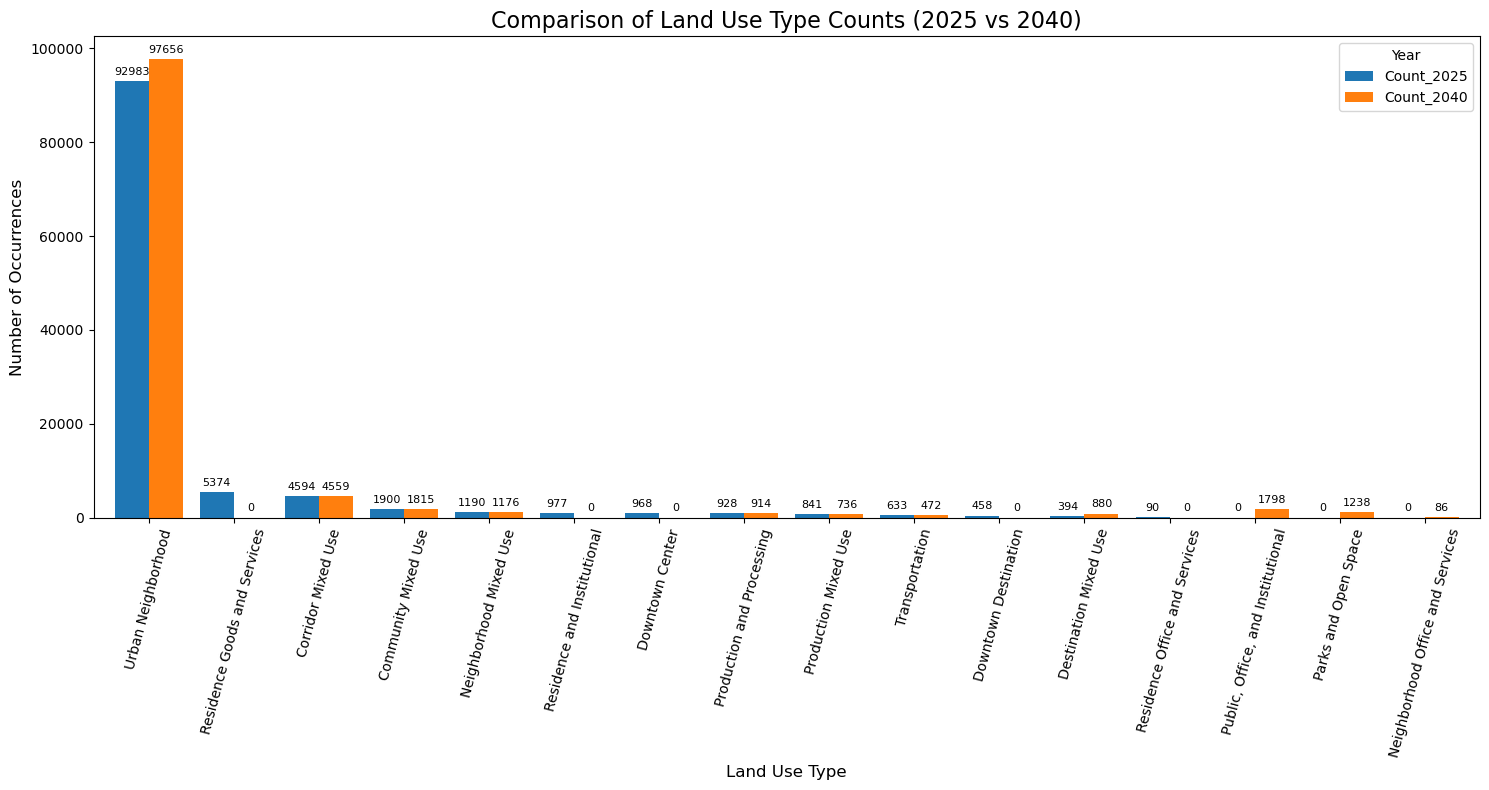

Comparison of Counts:
                                   Count_2025  Count_2040
Urban Neighborhood                    92983.0     97656.0
Residence Goods and Services           5374.0         0.0
Corridor Mixed Use                     4594.0      4559.0
Community Mixed Use                    1900.0      1815.0
Neighborhood Mixed Use                 1190.0      1176.0
Residence and Institutional             977.0         0.0
Downtown Center                         968.0         0.0
Production and Processing               928.0       914.0
Production Mixed Use                    841.0       736.0
Transportation                          633.0       472.0
Downtown Destination                    458.0         0.0
Destination Mixed Use                   394.0       880.0
Residence Office and Services            90.0         0.0
Public, Office, and Institutional         0.0      1798.0
Parks and Open Space                      0.0      1238.0
Neighborhood Office and Services          0.0     

In [54]:
import pandas as pd
counts_left = gdf_2025_2040['Land_Use_left'].value_counts()
counts_right = gdf_2025_2040['Land_Use_right'].value_counts()

comparison_df = pd.concat([counts_left, counts_right], axis=1, keys=['Count_2025', 'Count_2040'])
comparison_df = comparison_df.fillna(0)

comparison_df = comparison_df.sort_values('Count_2025', ascending=False)

fig, ax = plt.subplots(figsize=(15, 8)) 

comparison_df.plot(kind='bar', ax=ax, width=0.8) 

ax.set_title('Comparison of Land Use Type Counts (2025 vs 2040)', fontsize=16)
ax.set_xlabel('Land Use Type', fontsize=12)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.tick_params(axis='x', rotation=75)
ax.legend(title='Year')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=8)

plt.tight_layout()
plt.show()

print("Comparison of Counts:")
total_2025 = comparison_df.loc[comparison_df.index != 'Total', 'Count_2025'].sum()
total_2040 = comparison_df.loc[comparison_df.index != 'Total', 'Count_2040'].sum()
comparison_df.loc['Total'] = [total_2025, total_2040]
print(comparison_df)

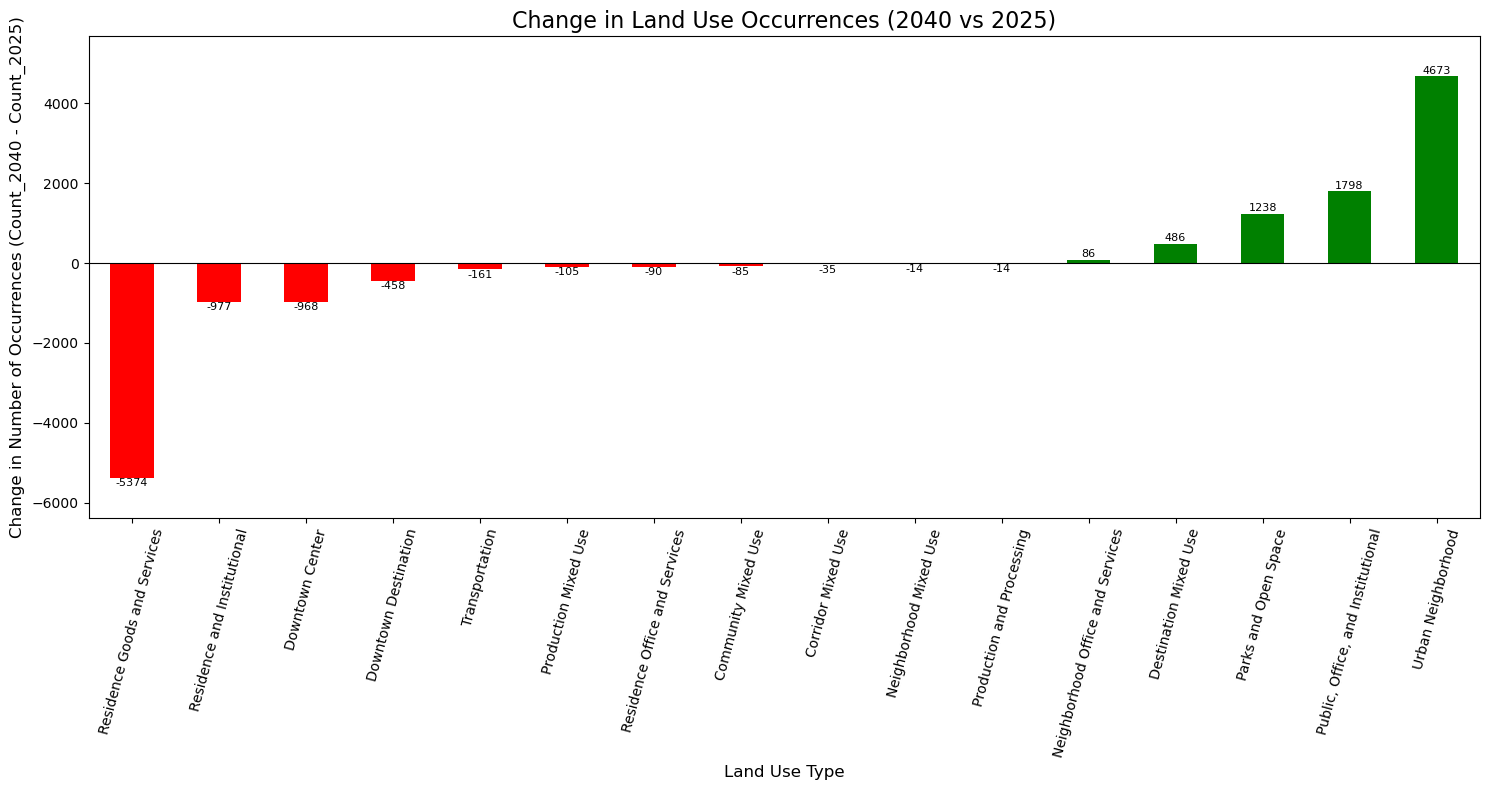

Change in Counts (2040 - 2025):
Residence Goods and Services        -5374.0
Residence and Institutional          -977.0
Downtown Center                      -968.0
Downtown Destination                 -458.0
Transportation                       -161.0
Production Mixed Use                 -105.0
Residence Office and Services         -90.0
Community Mixed Use                   -85.0
Corridor Mixed Use                    -35.0
Neighborhood Mixed Use                -14.0
Production and Processing             -14.0
Neighborhood Office and Services       86.0
Destination Mixed Use                 486.0
Parks and Open Space                 1238.0
Public, Office, and Institutional    1798.0
Urban Neighborhood                   4673.0
Name: Difference, dtype: float64


In [ ]:
comparison_df['Difference'] = comparison_df['Count_2040'] - comparison_df['Count_2025']
diff_sorted = comparison_df['Difference'].sort_values()
fig_diff, ax_diff = plt.subplots(figsize=(15, 8))
colors = ['green' if x > 0 else 'red' if x < 0 else 'grey' for x in diff_sorted]
diff_sorted.plot(kind='bar', ax=ax_diff, color=colors)
ax_diff.set_title('Change in Land Use Occurrences (2025 vs 2040)', fontsize=16)
ax_diff.set_xlabel('Land Use Type', fontsize=12)
ax_diff.set_ylabel('Change in Number of Occurrences (Count_2040 - Count_2025)', fontsize=12)
ax_diff.tick_params(axis='x', rotation=75)
ax_diff.axhline(0, color='black', linewidth=0.8)
for i, value in enumerate(diff_sorted):
    va = 'bottom' if value >= 0 else 'top'
    padding = 5 if value >= 0 else -5 
    ax_diff.text(i, value + padding, f'{value:.0f}', ha='center', va=va, fontsize=8)
ax_diff.margins(y=0.1)

plt.tight_layout()
plt.show()

print("Change in Counts (2040 - 2025):")
print(diff_sorted)

In [ ]:
# land_use_options = ['Community Mixed Use', 'Corridor Mixed Use', 'Destination Mixed Use',
#  'Downtown Center', 'Downtown Destination', 'Neighborhood Mixed Use',
#  'Production and Processing', 'Production Mixed Use',
#  'Residence and Institutional', 'Residence Goods and Services',
#  'Residence Office and Services', 'Transportation', 'Urban Neighborhood 1',
#  'Urban Neighborhood 2', 'Urban Neighborhood 3']

land_use_options = ['Urban Neighborhood 1','Urban Neighborhood 2', 'Urban Neighborhood 3',
                "Residence Goods and Services", "Residence Office and Services", "Residence and Institutional",
                "Neighborhood Mixed Use", "Corridor Mixed Use", "Community Mixed Use", "Destination Mixed Use",
                "Downtown Center", "Downtown Destination", "Production Mixed Use", "Production and Processing",
                "Transportation"
]
# print(Land_Use_left, Land_Use_right)
land_use = Land_Use_left + Land_Use_right

# for x in land_use_options:
#     if x not in land_use_options:
#         print(x)

print("zones that will be removed by 2040")
for left in Land_Use_left:
    if left not in Land_Use_right:
        print(left)

print("---------------")
print("new zones that will exist by 2040")
for right in Land_Use_right:
    if right not in Land_Use_left:
        print(right)




zones that will be removed by 2040
Downtown Center
Downtown Destination
Residence and Institutional
Residence Goods and Services
Residence Office and Services
Urban Neighborhood 1
Urban Neighborhood 2
Urban Neighborhood 3
---------------

Urban Neighborhood
Parks and Open Space
Public, Office, and Institutional
Neighborhood Office and Services


## 2.2. Functions
This section defines all functions that will be used in your MVP and Project.

### Pre-processing functions

In [ ]:
def please_rename_me():
    pass

def rename_me_too():
    pass

### Analysis functions


In [ ]:
def another_function():
    pass

### Misc. functions

In [ ]:
def yet_another_function_here():
    pass

## 2.3. Execute your code. Let's go
These code cells will actually make your code run. Up until now you have only imported modules and defined modules.
This is where you start running code, passing variables, and creating maps, plots, and analytical results.

### Preparation and Pre-Processing Phase

In [ ]:
# Preparation and pre-processing code here

rename_me_too()

### Analysis and Modeling Phase

In [ ]:
another_function()

### Visualization and Plotting Phase

In [ ]:
yet_another_function_here()

## 2.4. Rationale
Why is this an MVP?
